In [ ]:
#Rochana G
#2019115129
#assignment 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Downloading and Loading the Dataset

data = pd.read_csv('/Users/hemalatha/Downloads/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Performing Visualizations

#Univariate Analysis

#Histplot

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

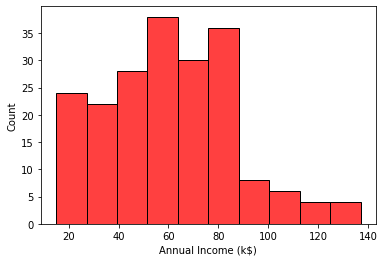

In [3]:
sns.histplot(data['Annual Income (k$)'], color="red")


<AxesSubplot:xlabel='Annual Income (k$)'>

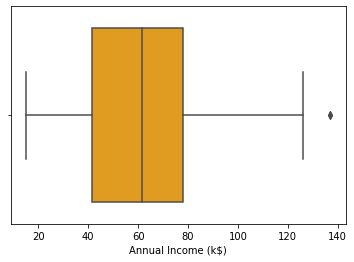

In [4]:
#Box Plot


sns.boxplot(data['Annual Income (k$)'], color="orange")


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

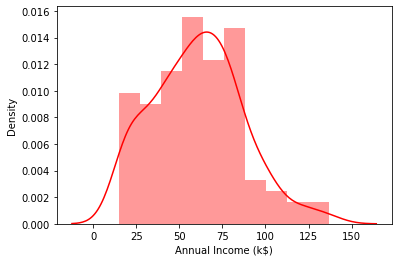

In [5]:
#Dist Plot

sns.distplot(data['Annual Income (k$)'], color="red")

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

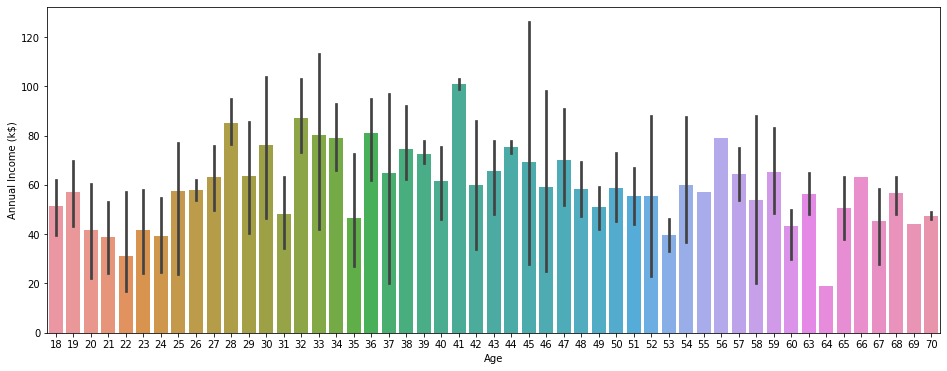

In [6]:
#Bi-variate Analysis

#Barplot

plt.figure(figsize=(16,6))
sns.barplot(data['Age'],data['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

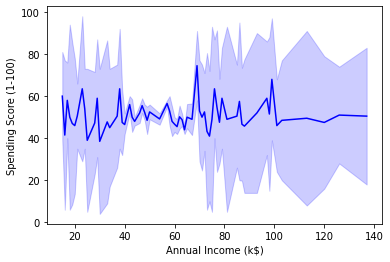

In [7]:
#Lineplot

sns.lineplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], color="blue")

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>

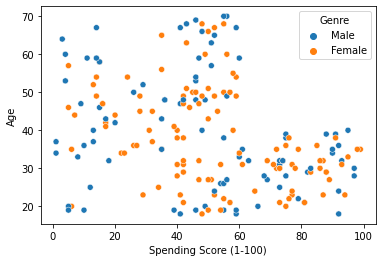

In [10]:
#Scatter plot (Age vs Spending Score)

sns.scatterplot(data['Spending Score (1-100)'], data['Age'], hue = data['Genre'])

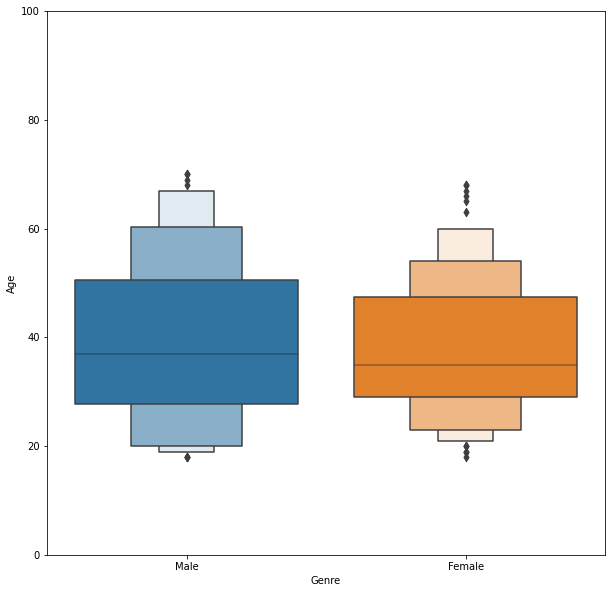

In [12]:
#Gender vs Age Distribution

temp = pd.concat([data['Age'], data['Genre']], axis=1)

f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxenplot(x='Genre', y="Age", data=data)
fig.axis(ymin=0, ymax=100);

<AxesSubplot:xlabel='Genre', ylabel='Annual Income (k$)'>

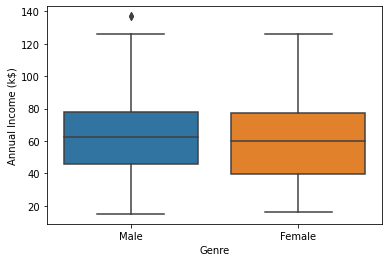

In [13]:
#Annual Income vs Gender Countplot

sns.boxplot(x=data['Genre'],y=data['Annual Income (k$)'])

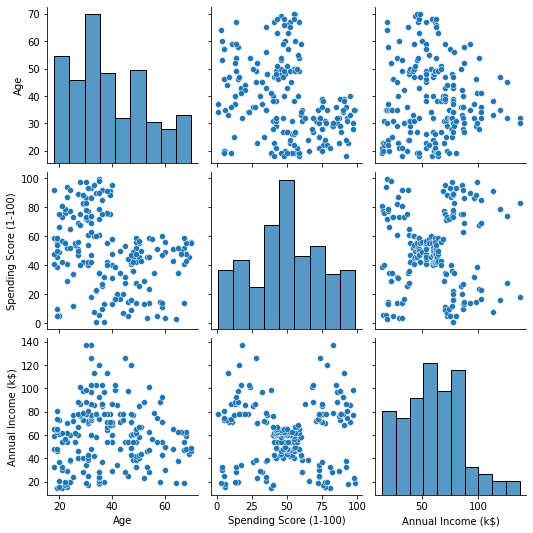

In [15]:
#Multi-variate Analysis

sns.pairplot(data=data[["Age", "Genre","Spending Score (1-100)","Annual Income (k$)"]])

<AxesSubplot:>

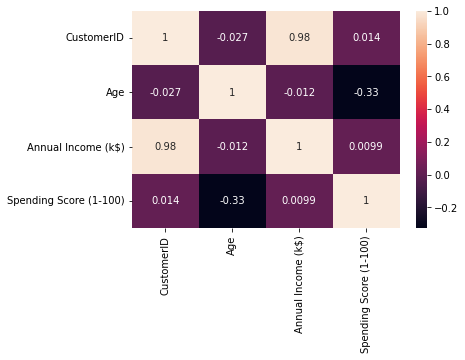

In [16]:
#Correlation between the different attributes

sns.heatmap(data.corr(),annot=True)

In [17]:
#Performing Descriptive Stats on the Dataset

data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
data.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [19]:
data.shape


(200, 5)

In [20]:
#Checking for null values

data.isnull().any() #Inference: The dataset has no null values

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [21]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [22]:
#Finding the outliers and replacing them

for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a994f64d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a994f6b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9a994f62d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9a994fe290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a994fe5d0>],
 'means': []}

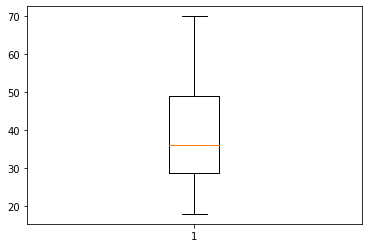

In [23]:
#After removing outliers, boxplot will be like

plt.boxplot(data['Age'])

In [25]:
#Checking for categorical columns and performing encoding

from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()
data['Genre'] = l_en.fit_transform(data['Genre'])
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


In [26]:
#Scaling the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

In [27]:
#Performing any of the clustering algorithms

from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([7, 7, 6, 6, 6, 6, 0, 6, 2, 6, 2, 6, 0, 6, 1, 7, 6, 7, 2, 6, 7, 7,
       0, 7, 0, 7, 0, 7, 0, 6, 2, 6, 2, 7, 0, 6, 0, 6, 0, 6, 0, 7, 2, 6,
       0, 6, 0, 6, 6, 6, 0, 7, 6, 2, 0, 2, 0, 2, 6, 2, 2, 7, 0, 0, 2, 7,
       0, 0, 7, 6, 2, 0, 0, 0, 2, 7, 0, 7, 6, 0, 2, 7, 2, 0, 6, 2, 0, 6,
       6, 0, 0, 7, 2, 0, 6, 7, 0, 6, 2, 7, 6, 0, 2, 7, 2, 6, 0, 2, 2, 2,
       2, 6, 4, 7, 6, 6, 0, 0, 0, 0, 7, 4, 3, 5, 4, 3, 1, 5, 2, 5, 1, 5,
       4, 3, 1, 3, 4, 5, 1, 3, 4, 5, 4, 3, 1, 5, 2, 3, 4, 5, 1, 5, 4, 3,
       4, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 4, 5, 1, 5, 1, 5, 4, 3,
       2, 5, 2, 5, 4, 3, 1, 3, 4, 5, 4, 5, 4, 3, 4, 3, 1, 3, 4, 3, 4, 5,
       1, 5], dtype=int32)

In [28]:
data1 = pd.DataFrame(data_scaled, columns = data.columns)
data1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [29]:
data1['kclus']  = pd.Series(res)
data1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,7
1,1.0,0.057692,0.000000,0.816327,7
2,0.0,0.038462,0.008493,0.051020,6
3,0.0,0.096154,0.008493,0.775510,6
4,0.0,0.250000,0.016985,0.397959,6


In [30]:
data1['kclus'].unique()


array([7, 6, 0, 2, 1, 4, 3, 5], dtype=int32)

In [31]:
data1['kclus'].value_counts()


0    37
6    34
2    29
7    24
3    22
4    19
5    18
1    17
Name: kclus, dtype: int64

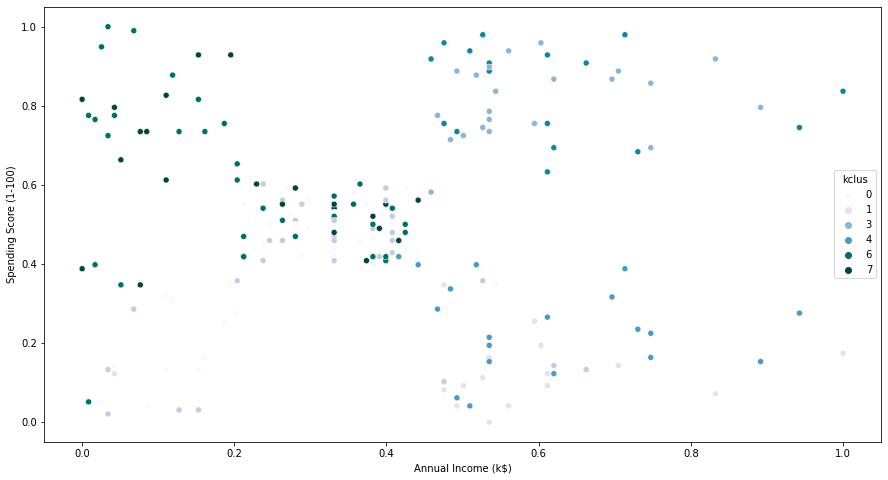

In [32]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual Income (k$)'],
                y=data1['Spending Score (1-100)'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [33]:
ind = data1.iloc[:,0:4]
ind.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [34]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,7
1,7
2,6
3,6
4,6


In [35]:
#Splitting dataset into train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [36]:
x_test.head()



,Genre,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [37]:
y_train.head()


,kclus
116,0
67,0
78,6
42,2
17,7


In [38]:
y_test.head()


,kclus
58,6
40,0
34,0
102,2
184,4


In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[ 4.40033581],
       [-0.12616441],
       [ 1.38105379],
       [ 0.99214097],
       [ 1.82357972]])

In [41]:
#Measuring the performance using metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  3.0245400001580216
The Root mean squared error is:  1.7391204674081728
The Mean absolute error is:  1.3576926452348492
The accuracy is:  0.4637340425251735
